In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import calendar
import argparse
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import xarray as xr
import wrf
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib.patches as patches

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [2]:
dir = "final_project/newvars/"

wrflist = [
Dataset(dir + "wrfout_d02_2022-08-03_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-03_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-04_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-04_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-05_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-05_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-06_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-06_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-07_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-07_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-08_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-08_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-09_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-09_12:00:00")
              ]

fdep = getvar(wrflist, "DFGDP", timeidx=ALL_TIMES, method="cat")
afdep = getvar(wrflist, "FGDP", timeidx=ALL_TIMES, method="cat")
qcloud = getvar(wrflist, "QCLOUD", timeidx=ALL_TIMES, method="cat")
# print(qcloud)
# qcloud_sum = qcloud.isel(bottom_top=[0,1,2]).sum(dim=["Time", "bottom_top"], keep_attrs=True)
# qcloud_sum
## ALT - inverse density
inverse_density = getvar(wrflist, "ALT", timeidx=ALL_TIMES, method="cat")
bl_rain = getvar(wrflist, "RAINNC", timeidx=ALL_TIMES, method="cat")
land_mask = getvar(wrflist, "LANDMASK", timeidx=ALL_TIMES, method="cat")

lwc = xr.merge([qcloud.isel(bottom_top=0) ,inverse_density.isel(bottom_top=0)])
lwc['LWC'] = 1000* lwc['QCLOUD'] / lwc['ALT']


In [3]:
dir = "WRFV3/test/em_real/"

wrflist = [
Dataset(dir + "wrfout_d02_2022-08-03_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-03_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-04_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-04_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-05_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-05_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-06_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-06_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-07_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-07_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-08_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-08_12:00:00"),
Dataset(dir + "wrfout_d02_2022-08-09_00:00:00"),
Dataset(dir + "wrfout_d02_2022-08-09_12:00:00")
              ]

# fdep = getvar(wrflist, "DFGDP", timeidx=ALL_TIMES, method="cat")
qcloud_nf = getvar(wrflist, "QCLOUD", timeidx=ALL_TIMES, method="cat")
# print(qcloud)
# qcloud_sum = qcloud.isel(bottom_top=[0,1,2]).sum(dim=["Time", "bottom_top"], keep_attrs=True)
# qcloud_sum
## ALT - inverse density
inverse_density_nf = getvar(wrflist, "ALT", timeidx=ALL_TIMES, method="cat")
bl_rain_nf = getvar(wrflist, "RAINNC", timeidx=ALL_TIMES, method="cat")
land_mask_nf = getvar(wrflist, "LANDMASK", timeidx=ALL_TIMES, method="cat")
dominant_veg = getvar(wrflist, "IVGTYP", timeidx=ALL_TIMES, method="cat")

lwc_nf = xr.merge([qcloud_nf.isel(bottom_top=0) ,inverse_density_nf.isel(bottom_top=0)])
lwc_nf['LWC_nf'] = 1000* lwc_nf['QCLOUD'] / lwc_nf['ALT']
lwc_nf = lwc_nf.drop_vars(['QCLOUD','ALT' ])

In [4]:

analysis_vars = xr.merge([fdep,afdep, lwc, lwc_nf, bl_rain, dominant_veg, land_mask])
analysis_vars['fogdep_per'] = analysis_vars['DFGDP']/analysis_vars["RAINNC"]
# analysis_vars_sub = analysis_vars.sel(south_north=[170, 300], west_east=[510, 550])

In [18]:
analysis_vars['dif'] = analysis_vars['LWC_nf'] - analysis_vars['LWC']
analysis_vars['dif'].max()

<xarray.DataArray 'dif' ()>
array(0.8993476)

In [ ]:
subset_lwc = lwc.sel(south_north=[170, 300], west_east=[510, 550])
# lwc.south_north(41, -124)(38, -122)

to_np(subset_lwc['XLONG'].max())
to_np(subset_lwc['XLONG'].min())
to_np(subset_lwc['XLAT'].max())
to_np(subset_lwc['XLAT'].min())


In [21]:
analysis_vars

<xarray.Dataset>
Dimensions:     (south_north: 594, west_east: 630, Time: 27)
Coordinates:
    XLONG       (south_north, west_east) float32 -141.7 -141.7 ... -118.4 -118.4
    XLAT        (south_north, west_east) float32 33.01 33.01 ... 49.26 49.26
    XTIME       (Time) float64 0.0 360.0 720.0 ... 8.64e+03 9e+03 9.36e+03
  * Time        (Time) datetime64[ns] 2022-08-03 ... 2022-08-09T12:00:00
    datetime    (Time) datetime64[ns] 2022-08-03 ... 2022-08-09T12:00:00
Dimensions without coordinates: south_north, west_east
Data variables:
    DFGDP       (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    FGDP        (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    QCLOUD      (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    ALT         (Time, south_north, west_east) float32 0.8449 0.8449 ... 0.9513
    LWC         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    LWC_nf      (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    RAINNC      (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    IVGTYP      (Time, south_north, west_east) int32 17 17 17 17 17 ... 1 1 1 1
    LANDMASK    (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 1.0 1.0
    fogdep_per  (Time, south_north, west_east) float32 nan nan nan ... nan nan
    dif         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Fog deposition during timestep
    units:        mm
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-131.0, moad_cen_lat=42.00000762...

In [23]:
### average dif over time
temp_avg= analysis_vars.mean(['south_north', 'west_east'], keep_attrs=True)
# ds.groupby("letters")["b"]
### average dif over space 
space_avg = analysis_vars.mean('Time', keep_attrs=True)


In [5]:
# analysis_vars.swap_dims({'Time': 'IVGTYP'})

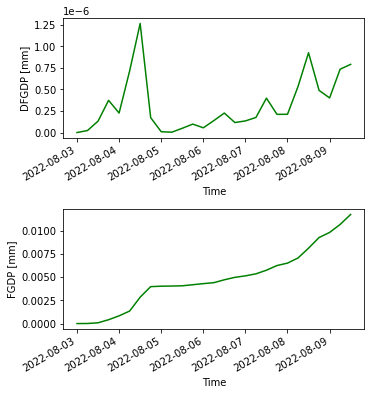

In [22]:
fig, axs = plt.subplots(nrows=2, figsize = (6,6))

fig.tight_layout(pad = 5)
temp_avg['DFGDP'].plot(ax=axs[0], color = 'g', hue = 'IVGTYP')
temp_avg['FGDP'].plot(ax=axs[1], color = 'g')

# temp_avg['FGDP'].plot(color = 'g')

In [ ]:
temp_avg['DFGDP'].plot(, color = 'g', hue = 'IVGTYP')


In [ ]:
temp_avg['dif'].plot()

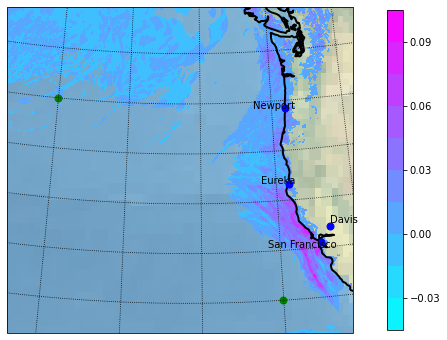

In [11]:
    # Get the latitude and longitude points
plot_var = space_avg
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
# cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
# Set the map bounds
ax.set_xlim(cartopy_xlim(plot_var))
ax.set_ylim(cartopy_ylim(plot_var))

plt.contourf(to_np(lons), to_np(lats),
             np.where(to_np(plot_var['dif']) ==0, np.nan, to_np(plot_var['dif']) )
             , 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("cool"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)


# mark a known place to help us geo-locate ourselves
# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

ax.plot(-140.05641, 45, 'go', markersize=7, transform=ccrs.Geodetic())

ax.plot(-125.05641, 35, 'go', markersize=7, transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")


plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
#                     interval=100)

# plt.show()
# ani.save('sine_wave.gif', writer='imagemagick')

# plt.show()

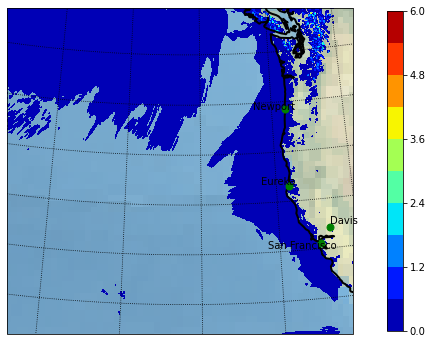

In [6]:
    # Get the latitude and longitude points
plot_var = analysis_vars.isel(Time = 26)
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
# cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
# Set the map bounds
ax.set_xlim(cartopy_xlim(plot_var))
ax.set_ylim(cartopy_ylim(plot_var))

plt.contourf(to_np(lons), to_np(lats),
             np.where(to_np(plot_var['FGDP']) ==0, np.nan, to_np(plot_var['FGDP']) )
             , 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)


# mark a known place to help us geo-locate ourselves
# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'go', markersize=7, transform=ccrs.Geodetic())
ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")


plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
#                     interval=100)

# plt.show()
# ani.save('sine_wave.gif', writer='imagemagick')

# plt.show()

/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


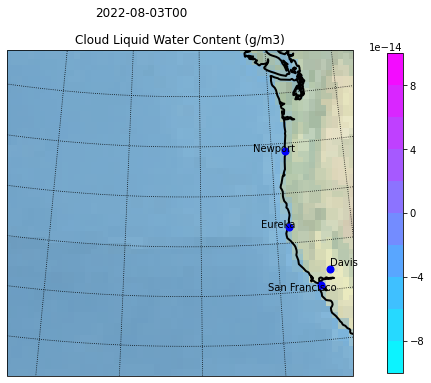

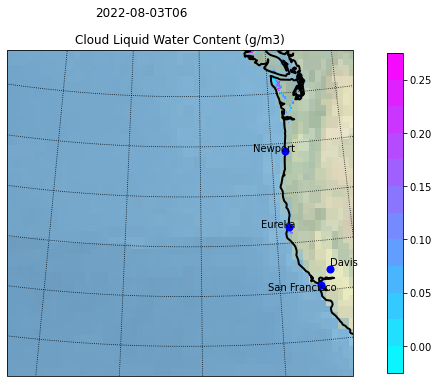

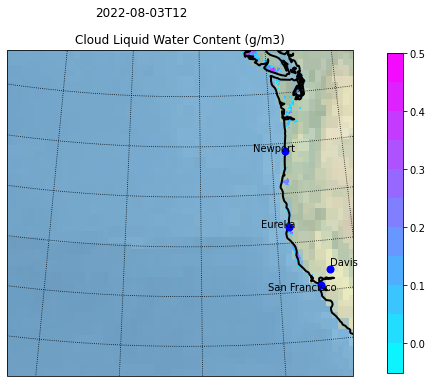

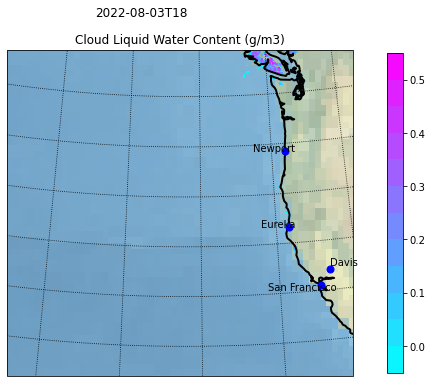

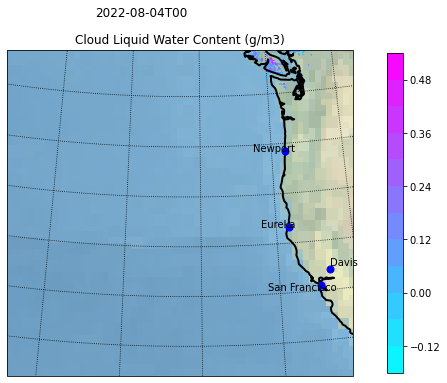

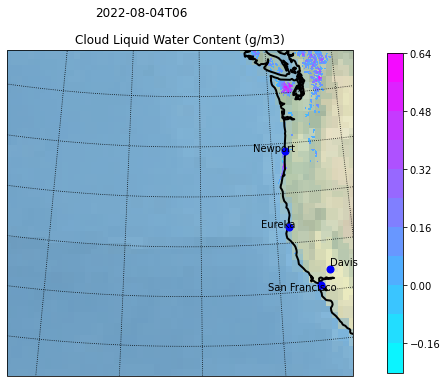

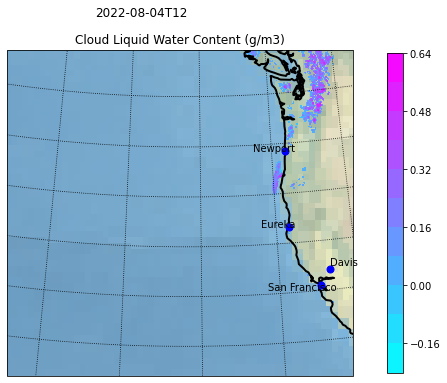

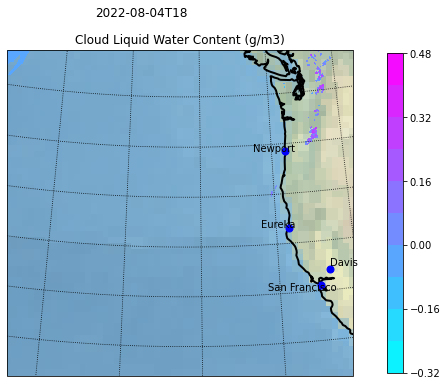

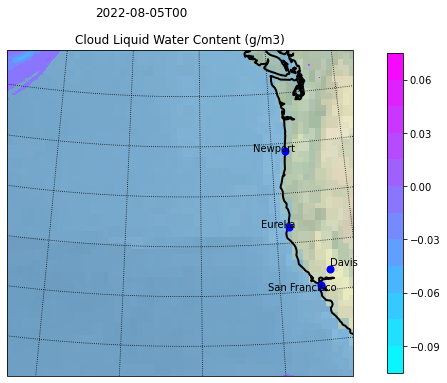

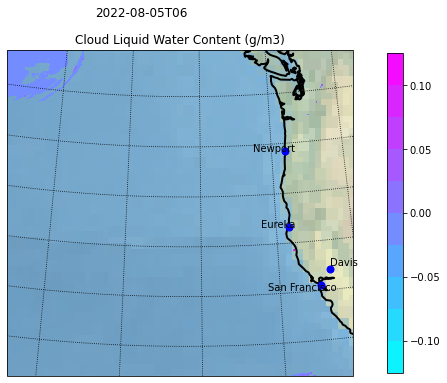

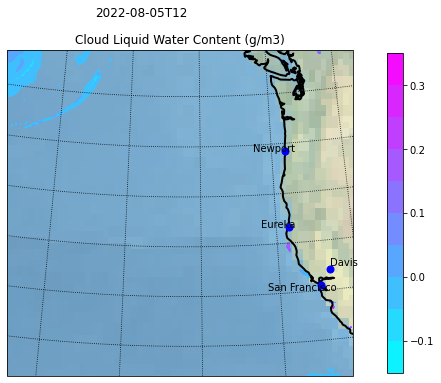

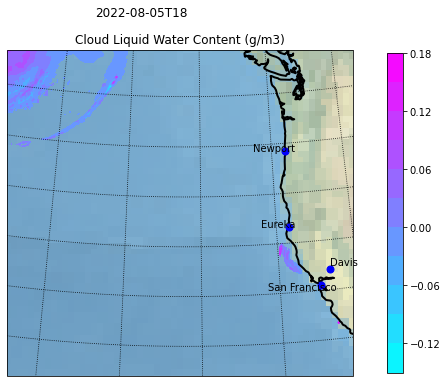

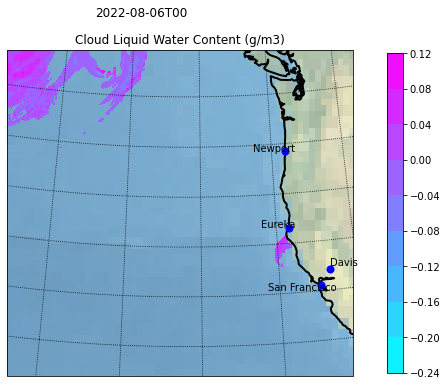

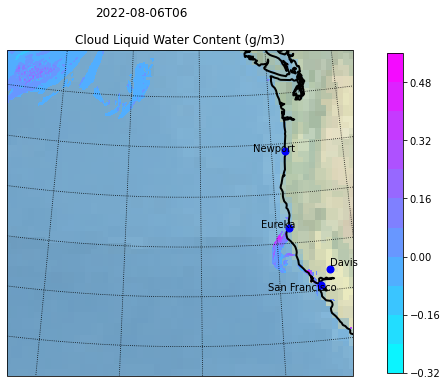

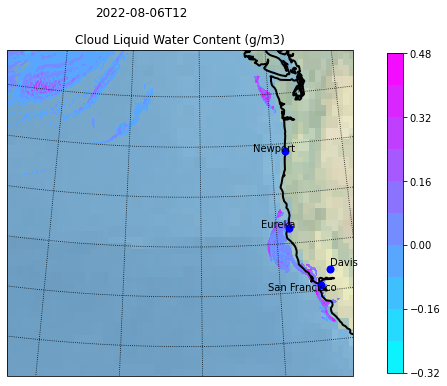

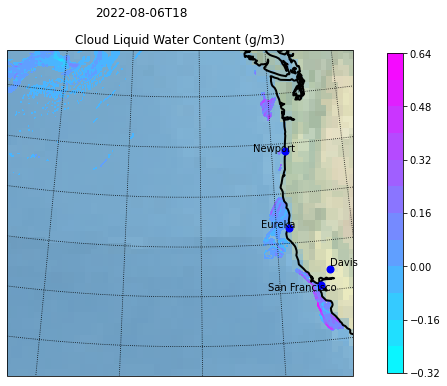

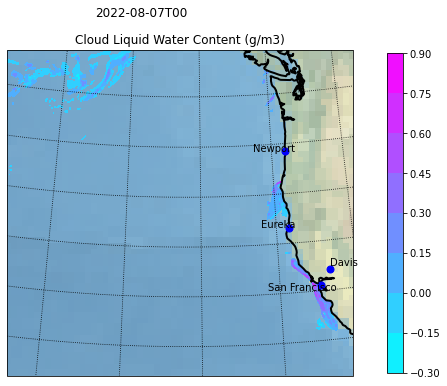

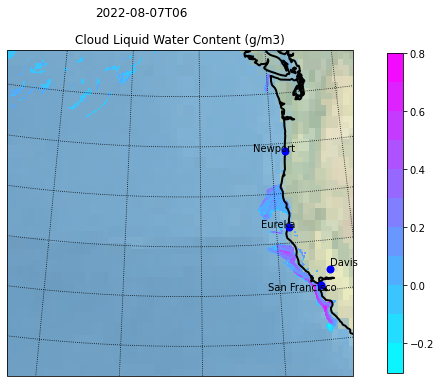

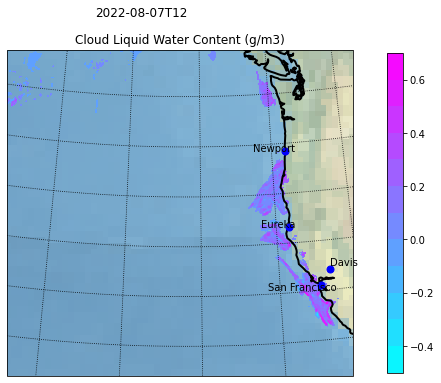

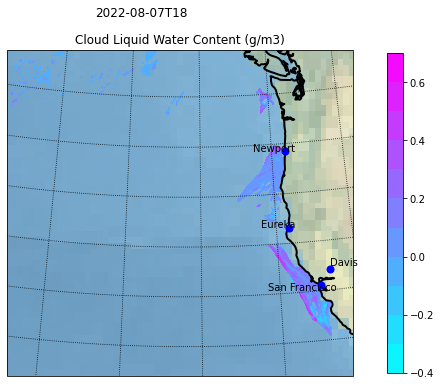

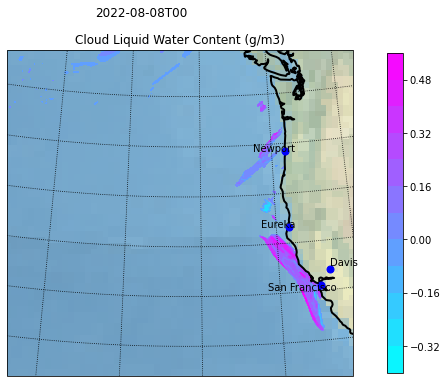

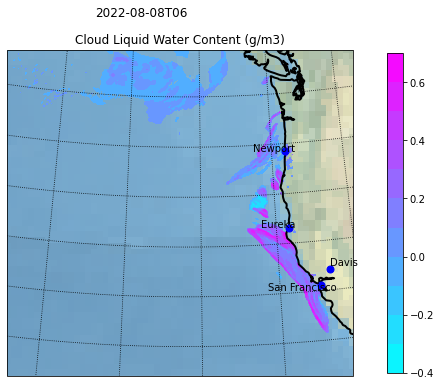

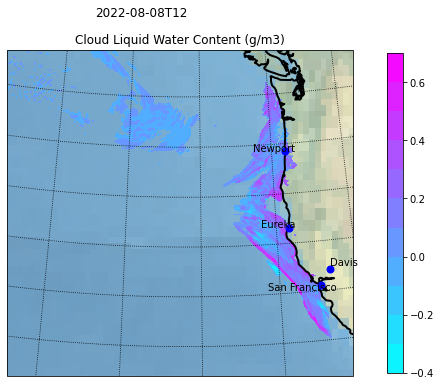

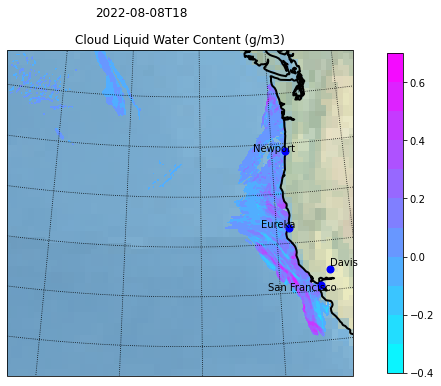

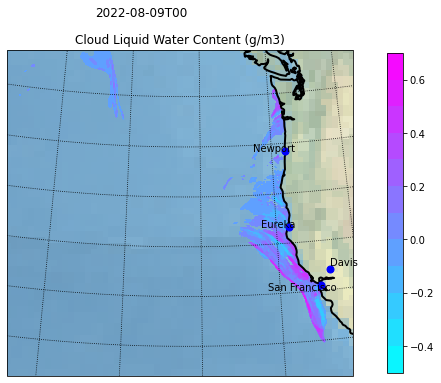

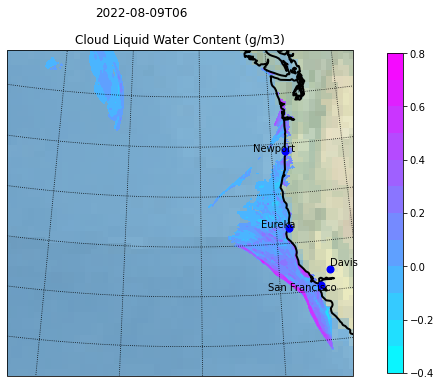

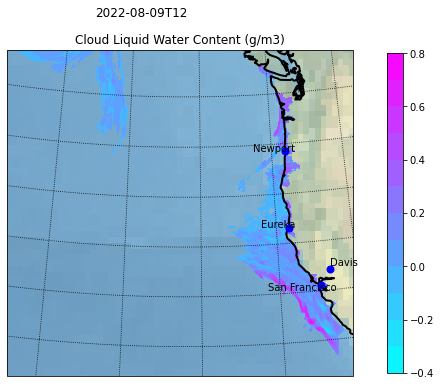

IndexError: index 27 is out of bounds for axis 0 with size 27

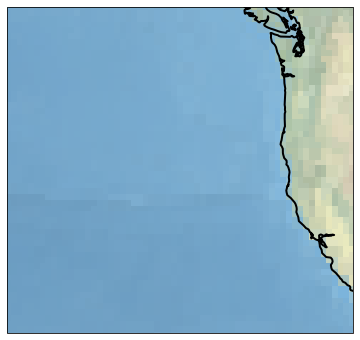

In [24]:
for i in range(28):  ##plot dominant veg
    # Get the latitude and longitude points
    plot_var = analysis_vars
    lats, lons = latlon_coords(plot_var)

    # Get the cartopy mapping object
    cart_proj = get_cartopy(plot_var)

    # Create a figure
    fig = plt.figure(figsize=(12,6))
    # Set the GeoAxes to the projection used by WRF
    ax = plt.axes(projection=cart_proj)
    # Download and add the states and coastlines
    # states = NaturalEarthFeature(category="cultural", scale="50m",
    #                              facecolor="none",
    #                              name="admin_1_states_provinces_shp")
    # ax.add_feature(states, linewidth=.5, edgecolor="black")
    ax.coastlines('50m', linewidth=2)
    ax.stock_img()
    # ax.states()
    # Make the contour outlines and filled contours for the smoothed sea level
    # pressure.
    # plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
    #             transform=crs.PlateCarree())
    # cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
    # Set the map bounds
    ax.set_xlim(cartopy_xlim(plot_var))
    ax.set_ylim(cartopy_ylim(plot_var))

    plt.contourf(to_np(lons), to_np(lats),
                 np.where(to_np(plot_var.isel(Time = i )['dif']) ==0, np.nan, to_np(plot_var.isel(Time = i )['dif']) )
                 , 10,
                 transform=crs.PlateCarree(),
                 cmap=get_cmap("cool"))

    # Add a color bar
    cb = plt.colorbar(ax=ax, shrink=.98)


    # mark a known place to help us geo-locate ourselves
# mark a known place to help us geo-locate ourselves
    ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

    ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

    ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

    ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
    ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    plt.title("Cloud Liquid Water Content (g/m3)" )
    plt.suptitle(str(np.array(plot_var.isel(Time = i )["Time"]))[:13])

    plt.show()# ani = FuncAnimation(fig, update_mesh, frames=ts,
    #                     interval=100)

    # plt.show()
    # ani.save('sine_wave.gif', writer='imagemagick')

# plt.show()

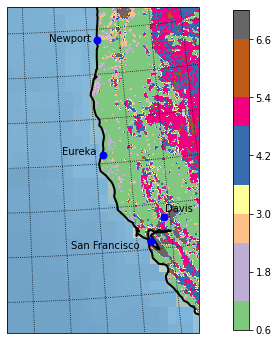

In [88]:
##plot dominant veg
# Get the latitude and longitude points
plot_var = veg_info
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), 
             # to_np(plot_var['factor_nums']),
                  np.where(to_np(plot_var['LAI']) ==0, np.nan,to_np(plot_var['factor_nums'])), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("Accent"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)
# cb.set_ticklabels([tt_factor[t] for t in range(12)])
# Set the map bounds
ax.set_xlim(np.array([211998, 911998.79804706]))
ax.set_ylim(np.array([-760499.39631137, 429000]))

# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# plt.title("Leaf Area Index and Canopy Water" /)

plt.show()

In [60]:
np.unique(to_np(plot_var))
labels = np.array(['conifer forest', 'broad forest','conifer forest', 'broad forest', 'mixed forest', 'shrub', 'shrub' ,
          'other', 'other','crop_grass', 'other','crop_grass', 'other','crop_grass', 'other','crop_grass', 
       'other' ])

tt_factor, tt_label = np.unique(to_np(plot_var['tt']), return_inverse = True)

In [62]:
tt_label

array([5, 5, 5, ..., 1, 1, 1])

In [30]:
veg_info = xr.merge([LAI ,dominant_veg])

In [32]:
veg_info

<xarray.Dataset>
Dimensions:  (south_north: 594, west_east: 630)
Coordinates:
    XLONG    (south_north, west_east) float32 -141.7 -141.7 ... -118.4 -118.4
    XLAT     (south_north, west_east) float32 33.01 33.01 33.01 ... 49.26 49.26
    XTIME    float32 0.0
    Time     datetime64[ns] 2022-08-03
Dimensions without coordinates: south_north, west_east
Data variables:
    LAI      (south_north, west_east) float32 0.0 0.0 0.0 ... 2.574 2.629 2.769
    IVGTYP   (south_north, west_east) int32 17 17 17 17 17 17 17 ... 1 1 1 1 1 1
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LEAF AREA INDEX
    units:        m-2/m-2
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-131.0, moad_cen_lat=42.00000762...

In [89]:
veg_info['labels'] = xr.where(veg_info['IVGTYP'].isin([1, 3, 8, 9, 12]), 'conifer, etc',
                          xr.where(veg_info['IVGTYP'].isin([2, 4]), 'broad leaf',
    xr.where(veg_info['IVGTYP'].isin([5]), 'mixed forest',
         xr.where(veg_info['IVGTYP'].isin([6,7]), 'shrub',
         xr.where(veg_info['IVGTYP'].isin([10,12]), 'crop or grass',
         xr.where(veg_info['IVGTYP'].isin([14]), 'crop or landscape',
                'other'))))))

veg_info['factor_nums'] = xr.where(veg_info['IVGTYP'].isin([1, 3, 8, 9, 12]), 1,
                          xr.where(veg_info['IVGTYP'].isin([2, 4]), 2,
    xr.where(veg_info['IVGTYP'].isin([5]), 3,
         xr.where(veg_info['IVGTYP'].isin([6,7]), 4,
         xr.where(veg_info['IVGTYP'].isin([10,12]), 5,
         xr.where(veg_info['IVGTYP'].isin([14]), 6,
                7))))))

veg_info['height'] = xr.where(veg_info['IVGTYP'].isin([1, 3, 8, 9, 12]), 20,
                          xr.where(veg_info['IVGTYP'].isin([2, 4]), 20,
    xr.where(veg_info['IVGTYP'].isin([5]), 20,
         xr.where(veg_info['IVGTYP'].isin([6,7]), 4.0,
         xr.where(veg_info['IVGTYP'].isin([10,12]), 3.0,
         xr.where(veg_info['IVGTYP'].isin([14]), (20.0 + 3.0    )/2.0,
                100000))))))

veg_info['scaling_factor'] = xr.where(veg_info['IVGTYP'].isin([1, 3, 8, 9, 12]), 1,
                          xr.where(veg_info['IVGTYP'].isin([2, 4]), 0.8255,
    xr.where(veg_info['IVGTYP'].isin([5]), ( 1.0 + 0.8255 )/2.0,
         xr.where(veg_info['IVGTYP'].isin([6,7]), 1,
         xr.where(veg_info['IVGTYP'].isin([10,12]),  0.2170,
         xr.where(veg_info['IVGTYP'].isin([14]),  ( 1.0 + 0.2170 )/2.0,
               0))))))

In [72]:
veg_info['LAD'] = veg_info['LAI'] /veg_info['height'] 

In [75]:
veg_info['LAD'].min()

<xarray.DataArray 'LAD' ()>
array(0.)
Coordinates:
    XTIME    float32 0.0
    Time     datetime64[ns] 2022-08-03

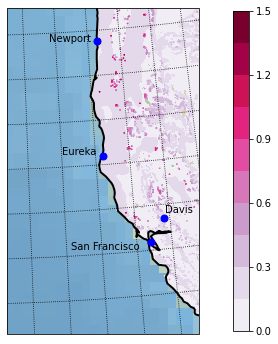

In [79]:
##plot dominant veg
# Get the latitude and longitude points
plot_var = veg_info
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats),
             # to_np(plot_var['LAD']),
     np.where(to_np(plot_var['LAD']) ==0, np.nan,to_np(plot_var['LAD'])),
             10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("PuRd"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)
# cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
# Set the map bounds
ax.set_xlim(np.array([211998, 911998.79804706]))
ax.set_ylim(np.array([-760499.39631137, 429000]))

# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# plt.title("Leaf Area Index and Canopy Water" /)

plt.show()

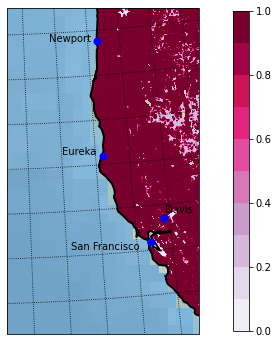

In [90]:
##plot dominant veg
# Get the latitude and longitude points
plot_var = veg_info
lats, lons = latlon_coords(plot_var)

# Get the cartopy mapping object
cart_proj = get_cartopy(plot_var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=2)
ax.stock_img()
# ax.states()
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(plot_var), 10, colors="black",
#             transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats),
             # to_np(plot_var['LAD']),
     np.where(to_np(plot_var['LAD']) ==0, np.nan,to_np(plot_var['scaling_factor'])),
             10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("PuRd"))

# Add a color bar
cb = plt.colorbar(ax=ax, shrink=.98)
# cb.set_ticklabels([aninv[t] for t in [0,1,2,3,4]])
# Set the map bounds
ax.set_xlim(np.array([211998, 911998.79804706]))
ax.set_ylim(np.array([-760499.39631137, 429000]))

# mark a known place to help us geo-locate ourselves
ax.plot(-122.42472, 37.77136, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-125.8, 37.7, 'San Francisco', transform=ccrs.Geodetic())

ax.plot(-124.17155, 40.78948, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126, 40.9, 'Eureka', transform=ccrs.Geodetic())

ax.plot(-121.74444, 38.54350, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-121.7, 38.7, 'Davis', transform=ccrs.Geodetic())

ax.plot(-124.05641, 44.63159, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-126.3, 44.7, 'Newport', transform=ccrs.Geodetic())

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# plt.title("Leaf Area Index and Canopy Water" /)

plt.show()

In [56]:
#         IF    ( lu_fogdes .eq. 'OTHERS'                ) THEN
#          dp_fog= (17.03*lwc*1.e3 + 9.72)*1.e-6 ! Katata et al. (2008) JAMC
#          vdfg(i,j)= (rhowater-rho(i,kts,j))*dp_fog**2.0*g/(18.0*myu)
#         ELSE
#          lu_select: SELECT CASE(lu_fogdes)
#          CASE ('CROP_GRASS')
#            spcfct= 0.2170
#            vegh  = 3.0               !// scaled from 3m tree calc.
#          CASE ('MIXED_CROP_GRASS_WOOD')
#            spcfct= ( 1.0 + 0.2170 )/2.0
#            vegh  = (20.0 + 3.0    )/2.0
#          CASE ('SHRUB')
#            spcfct= 1.0
#            vegh  = 4.0
#          CASE ('BROAD_FOREST')
#            spcfct= 0.8255
#            vegh  = 20.0
#          CASE ('MIXED_FOREST')
#            spcfct= ( 1.0 + 0.8255 )/2.0
#            vegh  = 20.0
#          CASE ('CONIFER_FOREST_ETC')
#            spcfct= 1.0
#            vegh  = 20.0
#          END SELECT lu_select



array(['broad leaf', 'conifer, etc', 'crop or grass', 'crop or landscape',
       'mixed forest', 'other', 'shrub'], dtype='<U17')

In [48]:
veg_info['IVGTYP'].isin([2,4])['XLONG']

<xarray.DataArray 'XLONG' (south_north: 594, west_east: 630)>
array([[-141.6983  , -141.66568 , -141.63304 , ..., -121.05289 ,
        -121.0202  , -120.98752 ],
       [-141.70207 , -141.66942 , -141.63678 , ..., -121.04938 ,
        -121.01669 , -120.98398 ],
       [-141.70583 , -141.67317 , -141.64052 , ..., -121.04588 ,
        -121.01318 , -120.98047 ],
       ...,
       [-144.49496 , -144.45401 , -144.41306 , ..., -118.44818 ,
        -118.407135, -118.36607 ],
       [-144.50092 , -144.45996 , -144.41898 , ..., -118.44263 ,
        -118.40155 , -118.36047 ],
       [-144.5069  , -144.46591 , -144.42491 , ..., -118.43707 ,
        -118.395966, -118.35489 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -141.7 -141.7 ... -118.4 -118.4
    XLAT     (south_north, west_east) float32 33.01 33.01 33.01 ... 49.26 49.26
    XTIME    float32 0.0
    Time     datetime64[ns] 2022-08-03
Dimensions without coordinates: south_north, west_east